In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv").iloc[:,1:]
pd.set_option("display.max_columns", None)
df.head()

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,

In [49]:
df.shape

(3140, 107)

In [50]:
df.info()
df.describe()
#Vemos que hay 107 cabeceras, voy a contar un poco de qué van antes de seguie
#para ver qué info tenemos
#Población total. Evidentemente muy útil
#Número de personas en rangos de edadd de 10 años. También útil
#Luego por alguna razón hacen otra categoría de personas de +60
#Número y porcentaje de personas según su raza. Este es un informe bastante completo
#en el que aparecen las principales razas presentes en EEUU. Puede ser útil sobre
#todo al analizar enfermedades que tengan más presencia en algunas razas que en otras
#por razones genéticas

#Tenemos también estimaciones de la población en 2018 y cambio neto también en 2018
#Tasa de natalidad y mortalidad para medir los cambios en la población
#La población de una zona también puede cambiar por la inmigración, y dentro de esta lo
#tienen dividido en doméstica o internacional. Muy útil también

#Educación. De nuevo, otra base de datos en la que tenemos que analizar temas relacionados
#con la salud y nos dan datos del nivel educativo. Es importante tener en cuenta que
# en este caso estamos tratando con EEUU, donde no tienen sanidad pública. Dicho de otra
# forma, si tienes dinero, puedes costearte la inversión que supone cualquier tema sanitario
# si tienes estudios, cobrarás más y podrás acceder a la sanidad con más facilidad.
# Estudios --> Dinero --> Salud. Por tanto es relevante

#Otra categoría son medidores de pobreza, tanto de menores, como en total. Y también
#los ingresos medios por hogar. Estas van a ser muy relevantes por las mismas razones
# que he comentado en el apartado de educación

#Hay cuatro columnas que podemos meter en "empleo": cantidad de trabajadores en 2018
# cantidad de parados, fuerza laboral y tasa de desempleo. Si tener estudios suele
#correlacionar con tener dinero, tener trabajo seguramente correlacione más

#Las últimas ya son directamente de salud. Menciono algunas:
# Cantidad de médicos, enfermeros, asistentes médicos, hospitales, camas de UCI...
#Prevalencia de alguna condición médica y prevalencia de las más imporantes/frecuentes
#corazón, pulmones, obesidad, diabetes y riñones.

#Muy completo la vd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 107 entries, TOT_POP to Urban_rural_code
dtypes: float64(61), int64(44), object(2)
memory usage: 2.6+ MB


,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,1.288521e+04,11.556685,1.363803

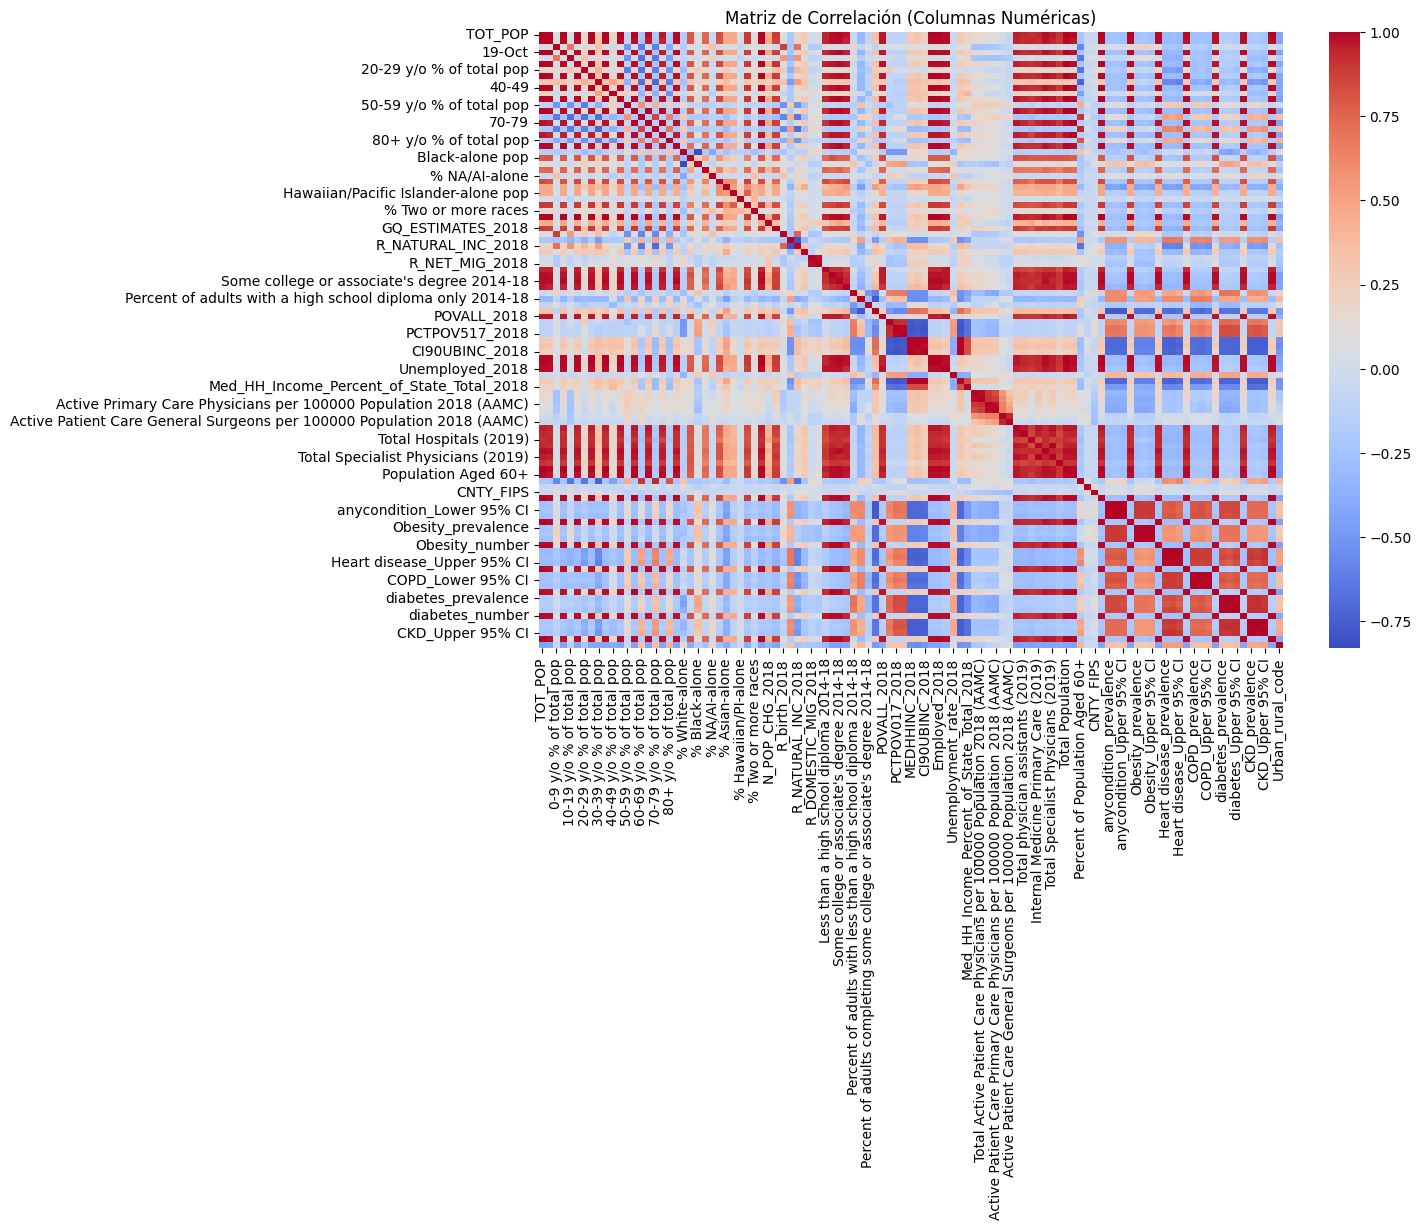

In [51]:
#Después de varios intentos fallidos, aquí está el código con que el que saco esta matriz
# de correlación.
#Primero hay que tomar solamente las variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

#Y luego ya calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

#Graficarla es muy estándar. Uso seaborn y patplotlib que ya estaban importadas de antes
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Matriz de Correlación (Columnas Numéricas)")
plt.show()

#Todos los cuadraditos muy rojos o muy azules nos indican una correlación fuerte
#Podemos ver que hay bastantes, lo cual interpreto como una buena señal porque significa
#que el algoritmo de regresión va a tener en qué apoyarse para sacar correlaciones


In [52]:
#Antes de seguir, elimino las columnas con menos de la mitad de los datos.
#No tendrán valor predictivo si están más bien vacías
df = df.dropna(thresh=len(df) * 0.5, axis=1)

In [53]:
# Estas dos columnas han estado incordiando un tiempo por ser las de COUNTY_NAME', 'STATE_NAME,
#que no tienen valores numéricos
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Columnas no numéricas:", non_numeric_cols)

Columnas no numéricas: Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')


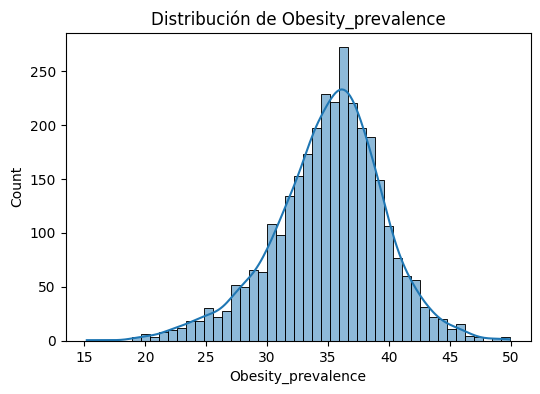

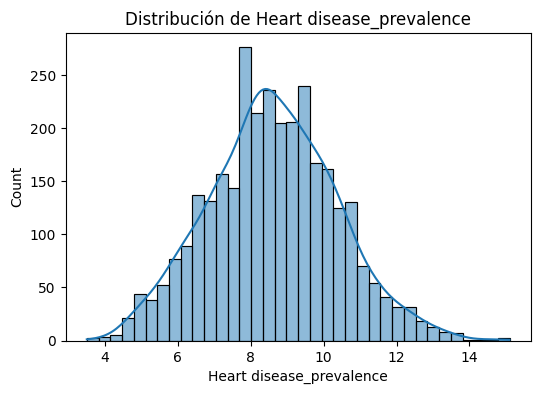

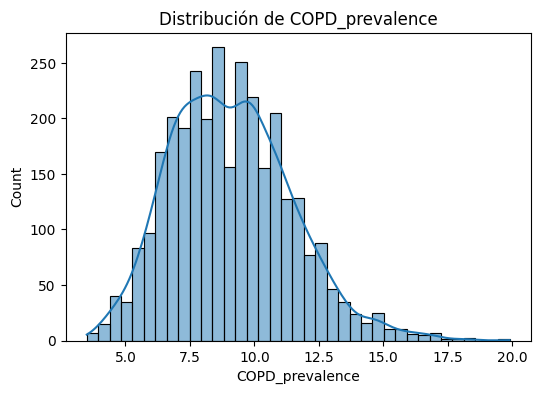

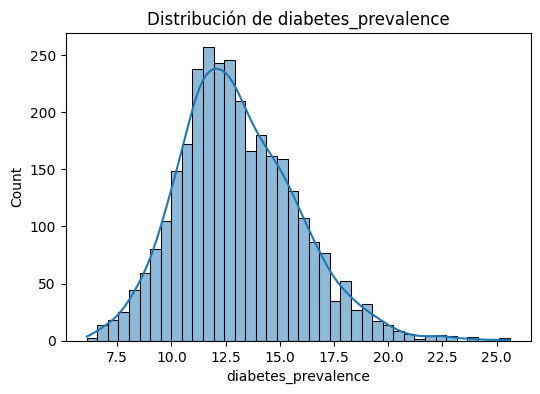

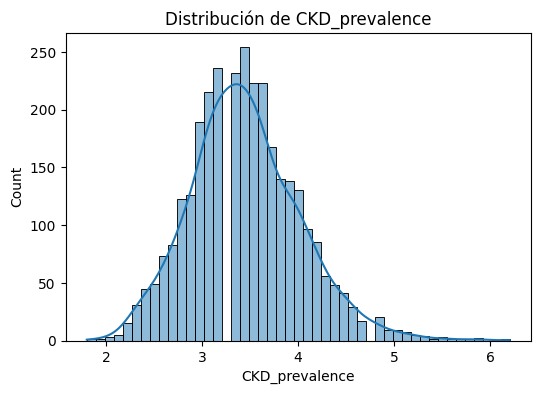

In [54]:
#Como hay más de una variable dentro de lo que podríamos englobar en la categoría de "salud",
# voy a visualizar las cinco principales para ver qué aspecto tiene su distribución
health_vars = ['Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence',
               'diabetes_prevalence', 'CKD_prevalence']

for var in health_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f"Distribución de {var}")
    plt.show()

In [55]:
# Antes de seguir y para ahorrarme errores, voy a seleccionar solamente las numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Y ahora saco la matriz de correlación
correlation_matrix = numeric_df.corr()
print(correlation_matrix['Obesity_prevalence'].sort_values(ascending=False))

Obesity_prevalence                                              1.000000
Obesity_Upper 95% CI                                            0.998239
Obesity_Lower 95% CI                                            0.998117
anycondition_Lower 95% CI                                       0.895747
anycondition_prevalence                                         0.894438
                                                                  ...   
CI90UBINC_2018                                                 -0.589779
Median_Household_Income_2018                                   -0.598189
MEDHHINC_2018                                                  -0.598189
CI90LBINC_2018                                                 -0.602412
Percent of adults with a bachelor's degree or higher 2014-18   -0.696026
Name: Obesity_prevalence, Length: 105, dtype: float64


In [56]:
# Aunque parezca increíble, aquí estoy revisando si alguna de las columnas numéricas
#contiene valores no numéricos. Por qué? Porque ya me he encontrado una que estaba
#constantemente dando error por ese motivo
for col in numeric_df.columns:
    try:
        numeric_df[col].astype(float)
    except ValueError:
        print(f"Columna con problemas: {col}")

In [57]:
# Definitivamente elimino las de county y state name
df = df.drop(columns=['COUNTY_NAME', 'STATE_NAME'], errors='ignore')

#Saco la misma habiendo evitado las de county y state
correlation_matrix = df.corr()
print(correlation_matrix['Obesity_prevalence'].sort_values(ascending=False))

Obesity_prevalence                                              1.000000
Obesity_Upper 95% CI                                            0.998239
Obesity_Lower 95% CI                                            0.998117
anycondition_Lower 95% CI                                       0.895747
anycondition_prevalence                                         0.894438
                                                                  ...   
CI90UBINC_2018                                                 -0.589779
Median_Household_Income_2018                                   -0.598189
MEDHHINC_2018                                                  -0.598189
CI90LBINC_2018                                                 -0.602412
Percent of adults with a bachelor's degree or higher 2014-18   -0.696026
Name: Obesity_prevalence, Length: 105, dtype: float64


In [58]:
#Antes de separar en train y test voy a escalar los datos para que el modelo no le
# dé más peso a unas variables que a otras simplemente por la magnitud en que aparecen
scaler = StandardScaler()
X_train_obesity_scaled = scaler.fit_transform(X_train_obesity)
X_test_obesity_scaled = scaler.transform(X_test_obesity)

In [59]:
# Vamos allá!
X_train_obesity, X_test_obesity, y_train_obesity, y_test_obesity = train_test_split(X_obesity, y_obesity, test_size=0.2, random_state=42)

#Por fin he llegado al punto de separar en train y test. Como siempre, he puesto 20% de test con test_size=0.2


In [60]:
model_lasso_obesity = Lasso(alpha=1.0)
model_lasso_obesity.fit(X_train_obesity_scaled, y_train_obesity)

Lasso()

In [61]:
model_lasso_obesity = Lasso(alpha=1.0, max_iter=10000)
model_lasso_obesity.fit(X_train_obesity_scaled, y_train_obesity)

Lasso(max_iter=10000)

In [62]:
model_lasso_obesity = Lasso(alpha=0.1)
model_lasso_obesity.fit(X_train_obesity_scaled, y_train_obesity)

Lasso(alpha=0.1)

In [ ]:
model_lr_obesity = LinearRegression().fit(X_train_obesity, y_train_obesity)
model_lasso_obesity = Lasso(alpha=1.0).fit(X_train_obesity, y_train_obesity)

In [64]:
#No tiene mala pinta en absoluto. Podemos ver que R^2 es prácticamente del 100%
#Es decir, que puede explicar casi el 100% de los datos del test. Esto demuestra
#también que los datos son bastante homogéneos y por tanto más fáciles de predecir

#En cuanto al MAE, como lo que está midiendo es el Mean Absolute Error, loq ue nos
#interesa es que este valor sea lo más bajo posible. Tener menos de un 5% es de nuevo
#un valor muy aceptable
y_pred_lr_obesity = model_lr_obesity.predict(X_test_obesity)
print(f"Linear Regression R^2 (Obesity): {r2_score(y_test_obesity, y_pred_lr_obesity)}")
print(f"Linear Regression MAE (Obesity): {mean_absolute_error(y_test_obesity, y_pred_lr_obesity)}")


Linear Regression R^2 (Obesity): 0.9998309234850961
Linear Regression MAE (Obesity): 0.04735290864744481


In [38]:
# En el RMSE obtenemos un valor algo más alto, pero de nuevo en un rango bastante bajo
rmse_obesity = mean_squared_error(y_test_obesity, y_pred_lr_obesity) ** 0.5
print(f"Linear Regression RMSE (Obesity): {rmse_obesity}")

Linear Regression RMSE (Obesity): 0.05908787252693198
